In [337]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### AskWomen Data Cleaning and EDA

##### Reading teh dataframe:

In [338]:
women_df = pd.read_csv('./Data/women_posts.csv')

In [339]:
women_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,suggested_sort,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,post_hint,preview,author_flair_background_color,author_flair_text_color,banned_by,call_to_action,category,author_flair_template_id,link_flair_template_id,link_flair_text,author_cakeday,edited
0,[],False,C4TERW4L,NaN,[],NaN,text,t2_w635x,False,False,False,[],False,False,1651207878,self.AskWomen,https://www.reddit.com/r/AskWomen/comments/uee...,{},uee930,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,1,0,False,all_ads,/r/AskWomen/comments/uee930/what_commonly_acce...,False,6,moderator,1651207889,1,[removed],True,False,False,AskWomen,t5_2rxrw,3491236,public,top,self,What commonly accepted wisdom about what makes...,0,[],1.0,https://www.reddit.com/r/AskWomen/comments/uee...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,throwawayalientk,NaN,[],NaN,text,t2_5992f1cb,False,False,False,[],False,False,1651207818,self.AskWomen,https://www.reddit.com/r/AskWomen/comments/uee...,{},uee8hp,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/AskWomen/comments/uee8hp/how_do_i_deal_with...,False,6,NaN,1651207829,1,Just wanted to share this and get some thought...,True,False,False,AskWomen,t5_2rxrw,3491233,public,top,self,How do I deal with having to interact with my ...,0,[],1.0,https://www.reddit.com/r/AskWomen/comments/uee...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,throwawayalientk,NaN,[],NaN,text,t2_5992f1cb,False,False,False,[],False,False,1651207471,self.AskWomen,https://www.reddit.com/r/AskWomen/comments/uee...,{},uee58o,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,1,0,True,all_ads,/r/AskWomen/comments/uee58o/how_do_i_deal_with...,False,6,moderator,1651207482,1,[removed],True,False,False,AskWomen,t5_2rxrw,3491220,public,top,nsfw,How do I deal with having to interact with my ...,0,[],1.0,https://www.reddit.com/r/AskWomen/comments/uee...,promo_adult_nsfw,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Exact_Roll_4048,NaN,[],NaN,text,t2_7dtxul8b,False,False,False,[],False,False,1651207393,self.AskWomen,https://www.reddit.com/r/AskWomen/comments/uee...,{},uee4h0,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/AskWomen/comments/uee4h0/for_those_who_have...,False,6,NaN,1651207403,1,NaN,True,False,False,AskWomen,t5_2rxrw,3491218,public,top,self,For those who have gone to AA meetings is ther...,0,[],1.0,https://www.reddit.com/r/AskWomen/comments/uee...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,Unfair_Salad_5521,NaN,[],NaN,text,t2_ha34dlxa,False,False,False,[],False,False,1651207340,self.AskWomen,https://www.reddit.com/r/AskWomen/comments/uee...,{},uee3yv,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/AskWomen/comments/uee3yv/what_are_signs_tha...,False,6,NaN,1651207351,1,"I have a slight feeling, this woman hates me. ...",True,False,False,AskWomen,t5_2rxrw,3491217,public,top,self,What are signs that your wife/girlfriend hates...,0,[],1.0,https://www.reddit.com/r/AskWomen/comments/uee...,all_ads,6,NaN,NaN,NaN,NaN,NaN,N

In [340]:
women_df.shape

(3000, 73)

In [341]:
women_df.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_is_blocked',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_created_from_ads_ui', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_richtext', 'link_flair_text_color', 'link_flair_type',
       'locked', 'media_only', 'no_follow', 'num_comments', 'num_crossposts',
       'over_18', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'suggested_sort',

In [342]:
women_df['title'].isnull().sum(), women_df['subreddit'].isnull().sum(), women_df['author'].isnull().sum()

(0, 0, 0)

- There are no nulls in the 'title', 'author' and 'subreddit' columns

##### Check for duplicated titles:

In [343]:
women_df['title'].value_counts()

Why?                                                                                     3
who would be kind enough to talk to me for a bit?                                        3
What do I do about my fiance's family who think I'm ugly?                                3
Are anabolic steroids a turn off? Why or why not?                                        3
Who would have sex with an autistic man?                                                 3
                                                                                        ..
how would you accept my so when he was 25 and I was 15 if I was your daughter?           1
Women, how do you take men looking at your behind?                                       1
how would you accept my relationship with a 25 year old at 15 if I was your daughter.    1
How do I get over this feeling?                                                          1
What would be an absolute deal breaker for you on a date?                                1

Drop duplicated titles:

In [344]:
women_df = women_df.drop_duplicates(subset=['title'], keep='first')

In [345]:
women_df['title'].duplicated().sum()

0

In [346]:
#make sure all 'subreddit' == 'AskWomen'
women_df['subreddit'].unique()

array(['AskWomen'], dtype=object)

([], [])

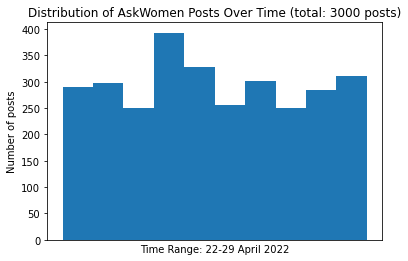

In [347]:
# Look at distribution of time posted:
plt.hist(women_df['created_utc'])
plt.title('Distribution of AskWomen Posts Over Time (total: 3000 posts)')
plt.xlabel('Time Range: 22-29 April 2022')
plt.ylabel('Number of posts')
plt.xticks([])

In [348]:
women_df['created_utc'][0], women_df['created_utc'][2999]

# latest post in df: Friday, 29 April 2022 04:51:18
# earliest post in df: Friday, 22 April 2022 15:14:11

(1651207878, 1650640451)

In [349]:
# fig, ax = plt.subplots(1, 2, figsize=(20,6))

# ax[0].hist(women_df['created_utc'], bins = 10)
# ax[0].set_title("AskWomen")
# ax[0].set_xlabel("Posting Date")
# ax[0].set_ylabel("Number of posts")

# ax[1].hist(men_df['created_utc'], bins = 10)
# ax[1].set_title("AskMen")
# ax[1].set_xlabel("Posting Date")
# ax[1].set_ylabel("Number of posts")
# ax[1].set_xticklabels([0, 1])

In [350]:
#create a new dataframe consisted of 4 columns: title, seltext, author & subreddit

In [351]:
women_posts_df = women_df.loc[:, ['title','author', 'subreddit']]

In [352]:
women_posts_df.head(3)

,title,author,subreddit
0,What commonly accepted wisdom about what makes...,C4TERW4L,AskWomen
1,How do I deal with having to interact with my ...,throwawayalientk,AskWomen
2,How do I deal with having to interact with my ...,throwawayalientk,AskWomen


##### Save new data frame as csv file:

In [353]:
women_posts_df.to_csv('./Data/women_titles.csv', index=False)

### AskMen Data Cleaning and EDA

In [354]:
men_df = pd.read_csv('./Data/men_posts.csv')

In [355]:
men_df.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,author_flair_background_color,author_flair_template_id,author_flair_text_color,banned_by,post_hint,preview,call_to_action,category,author_cakeday
0,[],False,mio_tanaka,NaN,[],NaN,text,t2_lvjza5du,False,False,False,[],False,False,1651437410,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug8s9...,{},ug8s9a,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,1,0,False,all_ads,/r/AskMen/comments/ug8s9a/should_i_care_my_gf_...,False,6,moderator,1651437421,1,[removed],True,False,False,AskMen,t5_2s30g,3698551,public,self,"Should I care my gf ""flirts"" with other girls?",0,[],1.0,https://www.reddit.com/r/AskMen/comments/ug8s9...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Retei83,NaN,[],NaN,text,t2_k31kagw7,False,False,False,[],False,False,1651437387,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug8ry...,{},ug8ryr,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,1,0,False,all_ads,/r/AskMen/comments/ug8ryr/anyone_got_any_exper...,False,6,moderator,1651437398,1,[removed],True,False,False,AskMen,t5_2s30g,3698549,public,self,Anyone got any experience dating with depression?,0,[],1.0,https://www.reddit.com/r/AskMen/comments/ug8ry...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,laurenlikeswine,NaN,[],NaN,text,t2_2mdny977,False,False,False,[],False,False,1651437369,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug8rq...,{},ug8rqo,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,1,0,False,all_ads,/r/AskMen/comments/ug8rqo/male_advice_for_deal...,False,6,moderator,1651437379,1,[removed],True,False,False,AskMen,t5_2s30g,3698548,public,self,Male advice for dealing with a broken heart? (...,0,[],1.0,https://www.reddit.com/r/AskMen/comments/ug8rq...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,LegalLog3683,NaN,[],NaN,text,t2_eho34ray,False,False,False,[],False,False,1651437239,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug8q5...,{},ug8q53,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,False,0,0,False,all_ads,/r/AskMen/comments/ug8q53/youre_given_100000_t...,False,6,NaN,1651437249,1,NaN,True,False,False,AskMen,t5_2s30g,3698539,public,self,"You’re given $100,000 to spend in 1 hour, if y...",0,[],1.0,https://www.reddit.com/r/AskMen/comments/ug8q5...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,v3ryclever,NaN,[],NaN,text,t2_j7l6nhue,False,False,False,[],False,False,1651437154,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug8p1...,{},ug8p19,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,1,0,False,all_ads,/r/AskMen/comments/ug8p19/should_i_shave_off_m...,False,6,moderator,1651437165,1,[removed],True,False,False,AskMen,t5_2s30g,3698535,public,self,Should I shave off my neckbeard?,0,[],1.0,https://www.reddit.com/r/AskMen/comments/ug8p1...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [356]:
men_df.shape

(3000, 69)

In [357]:
#check for nulls:
men_df['title'].isnull().sum(), men_df['subreddit'].isnull().sum(), men_df['author'].isnull().sum()

(0, 0, 0)

- There are no nulls in the 'title', 'author' and 'subreddit' columns

In [358]:
#make sure all 'subreddit' == 'AskMen'
men_df['subreddit'].unique()

array(['AskMen'], dtype=object)

([], [])

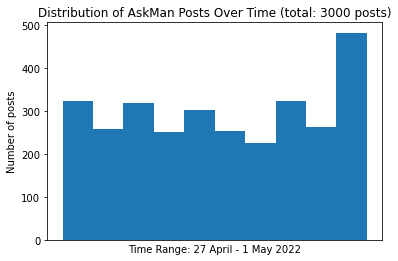

In [359]:
# Look at distribution of time posted:
plt.hist(men_df['created_utc'])
plt.title('Distribution of AskMan Posts Over Time (total: 3000 posts)')
plt.xlabel('Time Range: 27 April - 1 May 2022')
plt.ylabel('Number of posts')
plt.xticks([])

In [361]:
men_df['created_utc'][0], men_df['created_utc'][2999]

# latest post in df: Sunday, 1 May 2022 20:36:50
# earliest post in df: Wednesday, 27 April 2022 20:41:01

(1651437410, 1651092061)

In [362]:
men_df.shape

(3000, 69)

##### Check for duplicated titles:

In [363]:
men_df['title'].value_counts()

Is it a good idea to date and have sex with other men to get experience under your belt if your job and hobbies are too male-dominated to find women do date?    144
Is he still hung up on his ex?                                                                                                                                     7
How do I become a good man?                                                                                                                                        4
Help                                                                                                                                                               4
Do dominant men feel any attraction toward dominant women?                                                                                                         4
                                                                                                                                                                ... 
What are y

In [364]:
men_df['title'].duplicated().sum()

217

The dataset contains 217 duplicate titles.

Exploring the duplicated values:

In [365]:
pd.set_option('display.max_columns', 10000)

In [366]:
men_df[men_df['title'].duplicated()]

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,author_flair_background_color,author_flair_template_id,author_flair_text_color,banned_by,post_hint,preview,call_to_action,category,author_cakeday
12,[],False,Mediocre-Throw-390,NaN,[],NaN,text,t2_kjs9x81x,False,False,False,[],False,False,1651436676,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug8jb...,{},ug8jb5,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,True,all_ads,/r/AskMen/comments/ug8jb5/men_of_reddit_what_d...,False,6,moderator,1651436686,1,[removed],True,False,False,AskMen,t5_2s30g,3698508,public,nsfw,"Men of reddit, what do you do while masturbating?",0,[],1.00,https://www.reddit.com/r/AskMen/comments/ug8jb...,promo_adult_nsfw,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,[],False,SuccessCommercial151,NaN,[],NaN,text,t2_9iq8fcav,False,False,False,[],False,False,1651431591,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug6r9...,{},ug6r99,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/AskMen/comments/ug6r99/guy_freaks_out_when_...,False,6,NaN,1651431602,1,NaN,True,False,False,AskMen,t5_2s30g,3698276,public,self,Guy freaks out when I try to get insight on ou...,0,[],1.00,https://www.reddit.com/r/AskMen/comments/ug6r9...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,[],False,alaingautier234,NaN,[],NaN,text,t2_mlltjw5i,False,False,False,[],False,False,1651426456,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug4xp...,{},ug4xph,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/AskMen/comments/ug4xph/how_do_i_become_a_go...,False,6,moderator,1651426467,1,[removed],True,False,False,AskMen,t5_2s30g,3698014,public,self,How do I become a good man?,0,[],1.00,https://www.reddit.com/r/AskMen/comments/ug4xp...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,[],False,ewokspeak12,NaN,[],NaN,text,t2_15zhl2,False,False,False,[],False,False,1651422042,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug3dr...,{},ug3drg,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/AskMen/comments/ug3drg/how_do_i_become_a_go...,False,6,reddit,1651422053,1,[removed],True,False,False,AskMen,t5_2s30g,3697777,public,self,How do I become a good man?,0,[],1.00,https://www.reddit.com/r/AskMen/comments/ug3dr...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,[],False,ewokspeak12,NaN,[],NaN,text,t2_15zhl2,False,False,False,[],False,False,1651418773,self.AskMen,https://www.reddit.com/r/AskMen/comments/ug28a...,{},ug28av,False,False,False,False,False,False,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/AskMen/comments/ug28av/how_do_i_become_a_go...,False,6,reddit,1651418784,1,[removed],True,False,False,AskMen,t5_2s30g,3697602,public,self,How do I become a good man?,0,[],1.00,https://www.reddit.com/r/AskMen/comments/ug28a...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

Drop duplicates:

In [367]:
men_df = men_df.drop_duplicates(subset=['title'], keep='first')

In [368]:
men_df.shape

(2783, 69)

In [373]:
men_df['title'].duplicated().sum()

0

In [374]:
#create a new dataframe consisted of 4 columns: title, seltext, author & subreddit

In [375]:
men_posts_df = men_df.loc[:, ['title','author', 'subreddit']]

In [376]:
men_posts_df.head(3)

,title,author,subreddit
0,"Should I care my gf ""flirts"" with other girls?",mio_tanaka,AskMen
1,Anyone got any experience dating with depression?,Retei83,AskMen
2,Male advice for dealing with a broken heart? (...,laurenlikeswine,AskMen


##### Save new data frame as csv file:

In [377]:
men_posts_df.to_csv('./Data/men_titles.csv', index=False)

### Binarize subreddit column and create a comnibned data frame: 

In [378]:
# binarize our classifier: 'is_xx'
women_posts_df['is_xx'] = 1
men_posts_df['is_xx'] = 0

In [379]:
modeling_df = pd.concat([women_posts_df, men_posts_df])

In [380]:
modeling_df.head()

,title,author,subreddit,is_xx
0,What commonly accepted wisdom about what makes...,C4TERW4L,AskWomen,1
1,How do I deal with having to interact with my ...,throwawayalientk,AskWomen,1
2,How do I deal with having to interact with my ...,throwawayalientk,AskWomen,1
3,For those who have gone to AA meetings is ther...,Exact_Roll_4048,AskWomen,1
4,What are signs that your wife/girlfriend hates...,Unfair_Salad_5521,AskWomen,1


In [381]:
modeling_df.sample(5)

,title,author,subreddit,is_xx
1352,"Thoughts on body hair? You keep it trimmed, sh...",SuchTemperature7,AskMen,0
750,Am I the only one who doesn’t see the appeal o...,PollutionCapable2121,AskMen,0
2387,How does this look as an DM approach to a woman?,albish,AskWomen,1
1360,How do you deal with street harassment?,Almost_Veggie,AskWomen,1
1896,what does it mean when a guy mirrors you but i...,Good-Hotel-1933,AskMen,0


In [382]:
modeling_df.shape

(5743, 4)

In [383]:
modeling_df.duplicated().sum()

0

In [384]:
modeling_df.isnull().sum()

title        0
author       0
subreddit    0
is_xx        0
dtype: int64

In [385]:
modeling_df.is_xx.value_counts()

1    2960
0    2783
Name: is_xx, dtype: int64

In [387]:
modeling_df.to_csv('./Data/modeling_df.csv', index=False)

The above data frame will be used for the modeling process.